# Discrete sampling
In the last problem of the first session we sampled with given probabilities using prefix sums and binary search. The sampling code is the bottleneck of the whole process, its running times is 3 times higher than the code for uniform probabilities, and the difference would only increase for larger number of outcomes. In the next two problems we discuss two simple, but powerful techniques one can use to sample in time $O(1)$.

**Problem 2a.** Consider the problem of sampling with known probabilities $p_1,\ldots,p_d$. Suppose that you have a black-box that samples with probabilities $q_1,\ldots,q_d$ that are close to $p_1,\ldots,p_d$, say
$$ \forall_{i=1,\ldots,n} p_i \le (1+\varepsilon)q_i.$$

* How can you use this black-box to sample with probabilities $p_1,\ldots,p_d$? It is expected, that the running time of the algorithm would be non-deterministic.
* Prove that your algorithm is correct.
* Implement the algorithm and use it to give a faster implementation for **Problem 1c**.

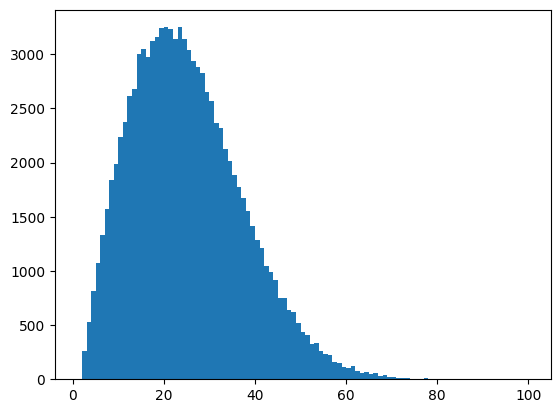

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Blackbox():

    def __init__(self, p, eps) -> None:
        self.p = p
        self.n = len(p)
        self.q = np.amax(p) / (1 + eps)
        # self.qarr = p * (1 + np.random.uniform() * eps)
    
    def getRand(self):

        while(True):
            i = np.random.randint(0, self.n)
            r = np.random.uniform()
            if (r < self.p[i] / self.q):
                return i
                
data = pd.read_csv("us_births_69_88.csv")
data = data.to_numpy()
births = data[:,2]
total = np.sum(births)
                     
propability = births / total
blackbox = Blackbox(propability, 0.001)

def repeat(length):
    s = set()
    for k in range(length):
        day = blackbox.getRand()
        if day in s:
            return k + 1
        else:
            s.add(day)

length = len(propability)
emp = [repeat(length) for iter in range(100000)]
plt.hist(emp, bins = range(1, 101))
plt.show()
